In [1]:
from ctd2xray import cchdo
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# download data for section P18
# http://cchdo.ucsd.edu/cruise/33RO20071215
! curl -O http://cchdo.ucsd.edu/data/10136/p18_33RO20071215_nc_ctd.zip
! unzip -q -d 33RO20071215 p18_33RO20071215_nc_ctd.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6417k  100 6417k    0     0  1773k      0  0:00:03  0:00:03 --:--:-- 1773k


In [5]:
# define target pressures for interpolation
target_pressure = np.arange(5.,6000.,10.)
# load dataset as a directory full of netcdf files
ds = cchdo.open_cchdo_as_mfdataset('33RO20071215/p18_*.nc', target_pressure)
ds

<xarray.Dataset>
Dimensions:           (pressure_i: 600, time: 173)
Coordinates:
  * pressure_i        (pressure_i) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 ...
  * time              (time) datetime64[ns] 2007-12-17T20:55:00 ...
    latitude          (time) float64 22.87 22.8 22.7 22.5 22.0 21.41 20.83 ...
    longitude         (time) float64 -110.0 -110.0 -110.0 -110.0 -110.0 ...
Data variables:
    woce_date         (time) int32 20071217 20071217 20071218 20071218 ...
    woce_time         (time) int32 2055 2252 151 643 1317 1910 40 627 1218 ...
    station           (time) |S40 '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' ...
    cast              (time) |S40 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' ...
    pressure_QC_i     (time, pressure_i) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    temperature_i     (time, pressure_i) float64 23.64 23.65 23.61 22.9 ...
    temperature_QC_i  (time, pressure_i) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    salinity_i        (time, pressure_i) float64 3

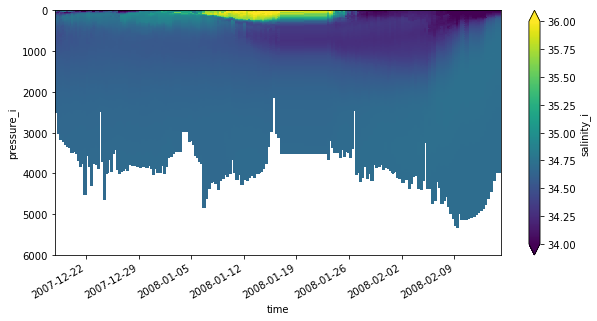

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ds.salinity_i.T.plot(yincrease=False, ax=ax, vmin=34, vmax=36)
fig.autofmt_xdate()

In [7]:
# reindex section by latitude
dslat = ds.swap_dims({'time': 'latitude'})

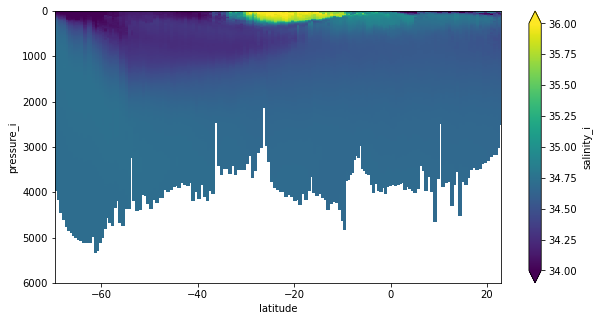

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
dslat.salinity_i.T.plot(ax=ax, yincrease=False, vmin=34, vmax=36)